### Análisis de normalidad

Los análisis de normalidad, también llamados contrastes de normalidad, tienen como objetivo analizar si los datos disponibles podrían proceder de una población con una distribución normal. Existen tres estrategias principales abordar este análisis:

* Representaciones gráficas

* Métodos analíticos

* Test de hipótesis.

Uno de los ejemplos más empleados cuando se habla de variables aleatorias que siguen una distribución normal es la altura de las personas. Esta afirmación no es arbitraria, los procesos cuyo resultado es la suma de muchas pequeñas interacciones suelen converger en una distribución normal. La altura de una persona, es el resultado de miles de factores que se suman unos a otros condicionando el crecimiento.

A lo largo del siguiente documento se muestra como utilizar diferentes estrategias para determinar si la altura de un conjunto de personas sigue una distribución normal.

In [1]:

#  Tratamiento de datos 

import pandas as pd
import numpy as np

# Graficos

import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesaod y análisis

import statsmodels.api as sm
from scipy import stats

# configuración matplotlib 

plt.style.use('ggplot')

# configuración de warnings 

import warnings 
warnings.filterwarnings('ignore')


In [2]:
# Datos - libro Statistical Rethinking by Richard McElreath - 
# sobre el pueblo !Kung San, que viven en el desierto de Kalahari entre Botsuana, Namibia y Angola.


url = ('https://raw.githubusercontent.com/JoaquinAmatRodrigo/' +
       'Estadistica-machine-learning-python/master/data/Howell1.csv')
datos = pd.read_csv(url)
print(datos.info())
datos.head(4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544 entries, 0 to 543
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   height  544 non-null    float64
 1   weight  544 non-null    float64
 2   age     544 non-null    float64
 3   male    544 non-null    int64  
dtypes: float64(3), int64(1)
memory usage: 17.1 KB
None


,height,weight,age,male
0,151.765,47.825606,63.0,1
1,139.700,36.485807,63.0,0
2,136.525,31.864838,65.0,0
3,156.845,53.041914,41.0,1


In [3]:
datos.describe()

,height,weight,age,male
count,544.000000,544.000000,544.000000,544.000000
mean,138.263596,35.610618,29.344393,0.472426
std,27.602448,14.719178,20.746888,0.499699
min,53.975000,4.252425,0.000000,0.000000
25%,125.095000,22.007717,12.000000,0.000000
50%,148.590000,40.057844,27.000000,0.000000
75%,157.480000,47.209005,43.000000,1.000000
max,179.070000,62.992589,88.000000,1.000000


In [4]:
## De todos los datos disponibles se seleccionan únicamente mujeres mayores de 15 años

mujeres = datos[(datos.age >15) & (datos.male == 0)]
print(mujeres.head())

print('=======================================')

peso_mujeres = mujeres['weight']
print(peso_mujeres.head())

    height     weight   age  male
1  139.700  36.485807  63.0     0
2  136.525  31.864838  65.0     0
4  145.415  41.276872  51.0     0
6  149.225  38.243476  32.0     0
8  147.955  34.869885  19.0     0
1    36.485807
2    31.864838
4    41.276872
6    38.243476
8    34.869885
Name: weight, dtype: float64


In [5]:
peso_mujeres.describe()

print(f'El peso minimo y maximo de las mujeres mayores de 15 años es: {min(peso_mujeres)} y {max(peso_mujeres)} ')

El peso minimo y maximo de las mujeres mayores de 15 años es: 22.6796 y 56.755699 


## Métodos gráficos 

Uno de los métodos gráficos más empleados para el análisis de normalidad consiste en representar los datos mediante un histograma y superponer la curva de una distribución normal con la misma media y desviación estándar que los datos disponibles.

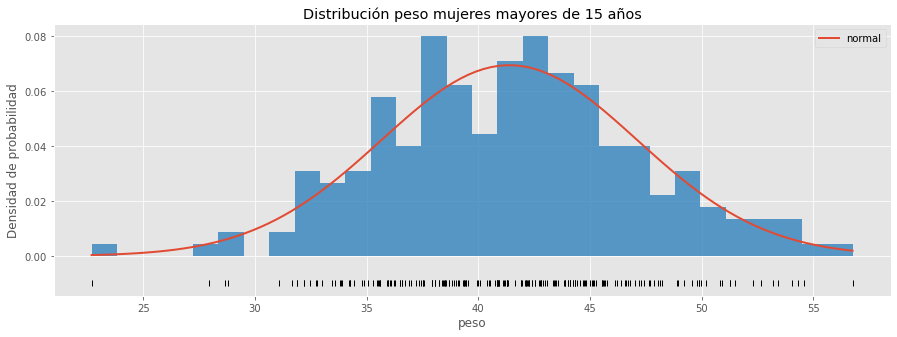

In [6]:
# Histograma + curva normal teórica

# Valores de la media (mu) y desviación típica (sigma) de los datos
mu, sigma = stats.norm.fit(peso_mujeres)

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(peso_mujeres), max(peso_mujeres), num= 100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# gráfico

fig, ax = plt.subplots(figsize = (15,5))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=peso_mujeres, density=True, bins=30, color="#3182bd", alpha=0.8)
ax.plot(peso_mujeres, np.full_like(peso_mujeres, -0.01), '|k', markeredgewidth=1)
ax.set_title('Distribución peso mujeres mayores de 15 años')
ax.set_xlabel('peso')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();



* linspace: La función numpy.linspace genera un array NumPy formado por n números equiespaciados entre dos dados. 
        Su sintaxis es:  numpy.linspace(valor-inicial, valor-final, número de valores)
        
        